In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import os 
sys.path.append('models/')
from Arima import ARIMA_Model, VAR_m
from exponential_regression import MultiDimensionalExponentialRegression, ExponentialRegression
from LinearRegression import LinearRegressionModel
from BayesianRegression import BayesianRegressionModel
from moving_average import MovingAverage
from SIRH import SIRH_model_2, Multi_SIRH_model
from useful_functions import get_classement, df_to_dict, concat_dico

In [68]:
coefs_esbs=pd.read_csv('./results/ensemble_models_coefs.csv')
coefs_esbs.index=['7', '14']
coefs_esbs.drop(columns=['Unnamed: 0'], inplace=True)
coefs_7_days=coefs_esbs.loc['7'][:-1]
coefs_14_days=coefs_esbs.loc['14'][:-1] 
intercept_7_days=coefs_esbs.loc['7'][-1]
intercept_14_days=coefs_esbs.loc['14'][-1]



In [11]:
models1Dnames=['ARIMA', 'Exponential', 'Moving Average', 'SIRH1', 'SIRH2', 'SIRH3', 'SIRH4', 'Linear Regression', 'Bayesian Regression']
models3Dnames=[ 'VAR', 'Exponential Multi', 'Moving Average Multi', 'SIRH Multi1', 'SIRH Multi2']
list_models=models1Dnames+models3Dnames
list_models.pop(11)
(list_models)

['ARIMA',
 'Exponential',
 'Moving Average',
 'SIRH1',
 'SIRH2',
 'SIRH3',
 'SIRH4',
 'Linear Regression',
 'Bayesian Regression',
 'VAR',
 'Exponential Multi',
 'SIRH Multi1',
 'SIRH Multi2']

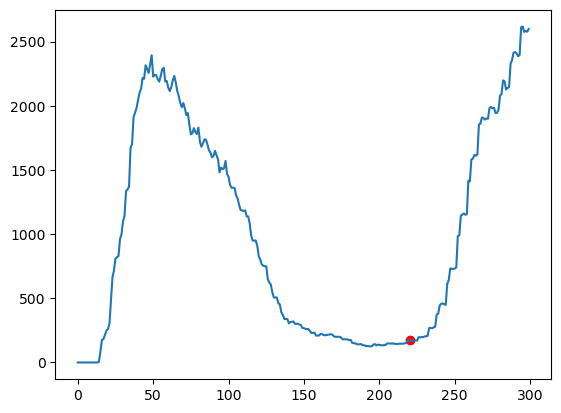

In [83]:
df=pd.read_csv('current-covid-patients-hospital.csv')
# df['Daily hospital occupancy']
# ne récupérer que les lignes ou la ligne 'Entity' vaut 'SWE'
df=df[df['Entity']=='Sweden'][['Day', 'Daily hospital occupancy']]
#récupérer les lignes : ['Day', 'Daily hospital occupancy']
hosp=np.array(df['Daily hospital occupancy'])
# add 0 values to begin from 2 march 
hosp=np.concatenate((np.zeros(11),hosp))
plt.plot([220], hosp[220], 'ro')
plt.plot(hosp[:300])
# from https://ourworldindata.org/covid-hospitalizations



In [42]:
# mobility : début = 2 mars 2020
df_mobility=pd.read_csv('mobility_bis.csv')
df_mobility.drop(columns=['Unnamed: 0'], inplace=True)
mobility=np.array(df_mobility['mobility'])


In [52]:
n_infected= [0,0,0,0,0,0,0,0,0,0,0,1,2,10,13,13,18,31,61,86,145,178,224,325,424,620,772,923,993,1060,1141,1259,1384,1520,1693,1821,1928,2099,2309,2601,2857,3190,3455,3697,4070,4494,4841,5326,5746,6033,6288,6587,7242,7781,8341,8529,8823,9189,9545,9931,10422,10763,11368,11814,12114,12490,13135,13781,14453,15145,15090,15316,15777,16238,16622,16782,16828,16574,16233,16354,16671,17027,17073,17120,16984,16809,16869,17160,17421,17599,17683,17418,16989,16887,17165,17512,17415,17225,16870,16298,16315,16761,16997,17029,17003,16799,16532,16879,17518,18087,18468,18869,18864,18625,18793,19451,20433,20972,21603,21978,21708,22035,22985,24012,24840,25235,25323,25112,25509,26608,27815,28345,28749,28730,28372,28667,29209,29246,29033,28681,28006,27175,26646,26462,26318,25715,24647,23662,22439,21577,21470,21072,20131,18958,17655,16556,15989,15900,15396,14307,12871,11730,10568,9884,9752,9327,8821,8394,8010,7354,7155,7173,7347,7447,7294,7220,6924,6812,7123,7396,7447,7504,7462,7241,7224,7428,7648,7755,7756,7696,7491,7527,7707,7880,7799,7677,7506,7296,7155,7288,7336,7289,7126,6919,6606,6531,6694,6812,6649,6497,6340,6102,6096,6325,6481,6556,6642,6588,6423,6529,6910,7289,7607,7993,8116,8104,8351,8916,9443,9905,10404,10579,10473,10676,11395,12041,12639,13108,13363,13233,13664,14474,15222,15832,16681,16989,16873,17365,18521,19826,21054,22368,23305,23189,23932,26179,29190,31839,35206,37560,38145,39253,42704,46811,50768,54391,58008,59322,62536,66871,71943,76591,82353,84963,85365,87211,91348,95537,101856,105743,108569,109124,111523,116682,121681,126166,129237,129800,128497,128989,133512,138487,141864,144720,144840,142189,141520,146867,151541,153735,155741,156715,153040,153064,158484,164762,169942,172895,170795,169087,169752,173922,181418,180780,177507,173570,170316,173583,179700,186679,187857,183928,179473,174889,177006,182748,183994,183696,180988,179030,173630,171740,174016,177077,174820,170199,162718,156051,152654,153634,153420,151021,143368,140699,138053,137971,138948,135962,129459,123253,118949,117495,116515,118076,114829,110680,108911,104092,99408,96197,97927,97632,96096,93068,91092,88098,87837,90792,93641,93042,92121,90703,88580,88750,93008,96099,96737,97215,97949,94937,95068,100094,103412,103978,104309,104364,102555,102204,107119,110940,112201,112841,112987,110457,110399,115974,120502,122032,122472,122718,120270,120176,126229,131391,132347,133660,134023,131419,131270,138489,143939,144710,146650,145159,142527,142164,147515,153338,155151,157425,157709,155088,154589,162432,166840,167701,167721,172720,169479,162390,168324,173353,171970,169773,174360,163429,166487,166563,170752,168227,164800,170134,164862,157657,163242,166663,165563,162973,159678,153719,152140,154455,156293,151355,146794,143789,138077,136675,137303,138030,134661,128278,124317,119067,115689,116662,115037,107869,101011,101293,97301,89015,90078,87231,82470,76979,77734,72233,62995,62547,60933,55351,50579,47183,47342,40787,39379,36058,34847,32036,32053,26564,25331,25261,24446,22091,22120,20709,20627,20487,18800,17455,14953,13912,13913,12835,11504,11652,11426,10483,9886,9893,8678,8596,8808,9158,9523,9826,9836,7654,7682,8203,8109,8081,8144,7780,7782,8590,9230,9444,9816,9942,9945,9665,10487,11450,11893,12346,12906,12912,12451,13939,15133,15752,16413,17080,17087,16730,18172,19483,20133,20642,21108,21112,20636,21894,23149,23825,24464,24728,24109,23424,25779,26800,26750,27214,27681,27679,26047,28223,29610,29533,29805,30254,30252,29202,30315,31405,30837,30491,30067,29038,29032,29163,30055,29082,28592,27794,27791,26520,26669,27550,26056,25795,25396,25392,23957,23823,24554,23223,22570,21765,21775,20298,19900,20800,19494,19048,18457,18465,17464,17704,18531,18138,18056,18202,18725,18272,18090,19352,19187,19418,19543,20403,20035,19862,21037,20672,20777,20673,21264,20197,20698,21987,22907,21924,22040,22868,22509,22499,23807,23940,24241,24775,25865,24677,25631,26886,28471,29324,30462,32219,31040,31520,33883,35678,36734,38059,40139,40236,41754,44214,46972,48717,50573,52962,53509,55307,58243,61691,64515,67483,70866,71750,73465,76569,80744,83821,89628,89876,89552,93656,100260,109849,118676,129271,132115,133478,143460,158047,179928,197625,210990,230477,243909,256146,275253,299153,321197,343375,369174,382918,407107,440995,478609,517609,552294,589965,615773,643828,686328,721870,766522,795123,829411,832943,847095,877213,903211,913994,915664,935598,927915,917599,901148,902051,886542,865876,868661,843714,820029,777177,757007,721901,684742,686663,604282,606525,541311,510603,466436,428525,429955,377119,339089,292770,270489,231749,198007,199242,171219,147057,119218,111775,93812,79518,80312,73236,68248,66012,65284,62323,59594,60191,56281,53782,53396,51255,49414,50544,47787,44668,42612,42219,42177,38620,39361,37230,35268,33577,33328,33804,31180,31791,30027,28581,27570,27519,27787,25811,26115,24460,22701,21507,21373,21687,19756,20161,19097,17832,17062,17507,17174,15842,16240,15338,14635,14140,14587,14453,13556,13860,14022,12400,11971,12332,12182,11246,11466,11561,10425,10325,10614,10830,10674,10896,11002,9859,9674,9761,9635,9776,9465,9151,8839,8612,8645,8894,8330,8496,8258,8323,7822,8002,8473,8294,8662,8781,8199,8208,8588,8775,9009,9356,8803,8558,8933,9326,9885,9966,10309,10206,10375,10664,11346,12064,12364,13083,13163,13376,13521,14106,14803,15214,15873,16224,15655,15957,16799,17696,18466,19502,19211,19081,19415,20460,21374,21260,22350,22197,22474,22179,23200,23939,23687,24674,24469,24748,24021,24836,26029,25746,26792,26480,26024,26027,26852,27879,27577,28807,28381,27721,27474,28244,29360,28767,29900,29188,28396,28024,28644,29169,28490,29399,28560,27687,27397,27961,28585,27562,28270,27350,26411,26143,26432,27099,26127,26979,26081,24997,24375,24880,25511,24390,25228,24243,23324,22880,23517,24269,23334,24114,23643,23044,22879,23670,24578,23916,33028,32454,31889,31709,32315,32744,31960,32549,32001,31376,31029,31322,31715,30661,31178,30532,29871,29538,29843,30214,29188,29670,29013,28400,28070,28438,28867,27694,28217,27437,26654,17983,18366,18768,18083,18531,18171,17643,17645,18066,18475,17958,18522,18216,17847,17816,18227,18648,17582,18173,17866,17591,17558,18051,18704,18423,19109,18822,18488,18822,19462,20615,20685,21868,21956,21706,22348,23900,25486,25739,27523,27842,27741,28693,30736,32945,34130,36334,36792,36838,37933,40134,42565,43800,45544,45480,45277,45125,45998,47883,47963,49682,49100,48330,48108,48805,49469,47721,48182,46673,45219,44106,43980,44103,41075,41509,39303,37087,35206,34451,34051,30262,30482,27907,25712,24104,23544,23111,20172,20354,18286,16546,14957,14353,14193,992,1167,1251,1298,1465,1633,1817,8141,8290,7680,7218,6885,6806,6820,6169,6259,5955,5711,5551,5516,5549,5139,5226,5051,4864,4764,4773,4807,4484,4594,4339,4173,4126,4170,4250,4078,4216,4075,3966,3944,3997,4106,3906,4050,3964,3908,3982,4124,4246,4211,4368,4334,4299,4337,4448,4592,4621,4632,4603,4587,4624,4758,4900,4747,5087,5013,4980,4942,5002,5144,5197,5216,5170,5125,5183,5278,5415,5188,5410,5351,5267,5269,5372,5483,5309,5525,5433,5354,5270,5366,5460,5216,5410,5283,5199,5273,5329,5334,5144,5297,5169,4949,4880,4937,5005,4678,4893,4737,4604,4540,4558,4556,4237,4383,4246,4118,4066,4058,4046,3823,3906,3755,3660,3612,3575,3573,3310,3390,3287,3153,3108,3093,3111,2858,2784,2671,2616,2577,2568,2564,2332,2391,2308,2236,2189,2195,2196,2153,2095,2030,1890,1940,1927,1913,1825,1803,1749,1670,1631,1610,1596,1534,1469,1410,1363,1334,1317,1310,1332,1352,1371,1377,1207,1236,1264,1314,1346,1362,949,983,1022,1062,1082,1128,1154,1175,1213,1244,1291,1336,1370,1396,1420,1253,1313,1349,1395,1428,1389,1402,1443,1510,1588,1641,1652,1722,1702,1761,1838,1888,1945,1997,1988,2055,2109,2210,2301,2343,2375,2440,2446,2535,2631,2721,2745,2683,2776,2759,2779,2835,2916,2869,3023,2987,2939,2962,3030,3114,3093,3002,3065,3005,3047,3083,3129,3002,3137,3091,3064,3080,3156,3263,3277,3150,3312,3316,3433,3558,3712,3680,3686,3674,3686,3855,4135,4375,4536,4629,4891,4986,5266,5652,6038,6284,6545,6914,7067,7527,8021,8508,8875,9181,9567,9686,10087,10570,11025,11317,11376,11791,11593,12132,12606,12949,13162,12985,13424,13360,13537,13835,14094,14088,13869,12997,13488,13859,14059,14244,14022,13294,13788,13461,13295,13518,13791,13605,13365,13015,12152,12809,12953,13045,12841,12559,11656,11952,11627,11523,11632,11414,11191,10906,10623,10488,10697,10646,9968,9633,9225,8902,8568,8403,8314,7925,7499,6547,7105,6793,6646,6545,6142,5738,5025,5199,4911,4803,4739,4593,4054,4160,3823,3518,3346,3223,3169,2691,2777,2575,2426,2353,2314,2205,1930,2001,1877,1775,1736,1705,1615,1429,1476,1413,1378,1357,1358,1293,1160,1207,1148,1144,1132,1130,1085,1050,926,974,936,925,926,875,861,816,782,761,756,751,720,693,663,630,615,615,616,584,563,530,476,530,522,521,482,466,448,445,419,406,388,368,352,331,314,288,305,292,268,250]        
# from https://www.worldometers.info/coronavirus/country/sweden/#coronavirus-cases-linear
# beginning at 2020-02-15
# attention 2020 est bissextile
# delete first 15 days to begin on 2 march
n_infected=n_infected[16:]

In [63]:
data3D=np.array([hosp[:306], n_infected[:306],mobility , [np.nan]*306])
df=pd.DataFrame(data3D)
df.columns=[str(i) for i in range(306)]
df.index=['n_hospitalized', 'n_infected', 'mobility', 'R_eff']
df.to_csv('./all_pandemics/pandemic_final_test.csv')

In [4]:
indexs_points=[[20*i] for i in range(1, 15) ]
indexs_points

[[20],
 [40],
 [60],
 [80],
 [100],
 [120],
 [140],
 [160],
 [180],
 [200],
 [220],
 [240],
 [260],
 [280]]

In [88]:
# dates en python : 
dates=pd.date_range(start='2020-03-02', periods=306).date
dates[[20*i for i in range(1, 15)]]

array([datetime.date(2020, 3, 22), datetime.date(2020, 4, 11),
       datetime.date(2020, 5, 1), datetime.date(2020, 5, 21),
       datetime.date(2020, 6, 10), datetime.date(2020, 6, 30),
       datetime.date(2020, 7, 20), datetime.date(2020, 8, 9),
       datetime.date(2020, 8, 29), datetime.date(2020, 9, 18),
       datetime.date(2020, 10, 8), datetime.date(2020, 10, 28),
       datetime.date(2020, 11, 17), datetime.date(2020, 12, 7)],
      dtype=object)

In [113]:
for j in range(  14): 
    print(dates[[20*i for i in range(1, 15)]][j].strftime('%Y-%m-%d'))

2020-03-22
2020-04-11
2020-05-01
2020-05-21
2020-06-10
2020-06-30
2020-07-20
2020-08-09
2020-08-29
2020-09-18
2020-10-08
2020-10-28
2020-11-17
2020-12-07


In [123]:
[dates[[20*i for i in range(1, 15)]][j].strftime('%m-%d') for j in range(14)]

['03-22',
 '04-11',
 '05-01',
 '05-21',
 '06-10',
 '06-30',
 '07-20',
 '08-09',
 '08-29',
 '09-18',
 '10-08',
 '10-28',
 '11-17',
 '12-07']

In [140]:
prediction_bis.loc[int(point[0])]

ARIMA                    48.840282
Moving Average          129.571429
SIRH1                  1966.592845
SIRH2                  1915.096525
SIRH3                   170.776588
SIRH4                   258.058622
Linear Regression       129.571429
Bayesian Regression     470.104913
VAR                     389.024880
SIRH Multi1             382.959562
SIRH Multi2             525.284971
Name: 20, dtype: float64

In [205]:
colors_models={'ARIMA':'blue', 'Exponential':'red', 'Moving Average':'green', 'SIRH1':'yellow', 'SIRH2':'orange', 'SIRH3':'purple', 'SIRH4':'pink', 'Linear Regression':'brown', 'Bayesian Regression':'black', 'VAR':'gray', 'Exponential Multi':'red', 'Moving Average Multi':'green', 'SIRH Multi1':'cyan', 'SIRH Multi2':'magenta'}

In [173]:
prediction_bis['ARIMA']


20       52.497867
40     1733.845928
60     1341.429653
80     1163.604889
100    1234.907672
120     813.283507
140     491.234747
160     490.251395
180     420.194237
200     357.920492
220     378.941638
240     691.684016
260    1427.574962
280    1952.105084
Name: ARIMA, dtype: float64

In [181]:
pd.date_range(start='2020-03-02', periods=306).date

array([datetime.date(2020, 3, 2), datetime.date(2020, 3, 3),
       datetime.date(2020, 3, 4), datetime.date(2020, 3, 5),
       datetime.date(2020, 3, 6), datetime.date(2020, 3, 7),
       datetime.date(2020, 3, 8), datetime.date(2020, 3, 9),
       datetime.date(2020, 3, 10), datetime.date(2020, 3, 11),
       datetime.date(2020, 3, 12), datetime.date(2020, 3, 13),
       datetime.date(2020, 3, 14), datetime.date(2020, 3, 15),
       datetime.date(2020, 3, 16), datetime.date(2020, 3, 17),
       datetime.date(2020, 3, 18), datetime.date(2020, 3, 19),
       datetime.date(2020, 3, 20), datetime.date(2020, 3, 21),
       datetime.date(2020, 3, 22), datetime.date(2020, 3, 23),
       datetime.date(2020, 3, 24), datetime.date(2020, 3, 25),
       datetime.date(2020, 3, 26), datetime.date(2020, 3, 27),
       datetime.date(2020, 3, 28), datetime.date(2020, 3, 29),
       datetime.date(2020, 3, 30), datetime.date(2020, 3, 31),
       datetime.date(2020, 4, 1), datetime.date(2020, 4, 2),
  

In [192]:
[dates[[20*i for i in range(1, 15)]][j].strftime('%Y-%m-%d') for j in range(14)]

['2020-03-22',
 '2020-04-11',
 '2020-05-01',
 '2020-05-21',
 '2020-06-10',
 '2020-06-30',
 '2020-07-20',
 '2020-08-09',
 '2020-08-29',
 '2020-09-18',
 '2020-10-08',
 '2020-10-28',
 '2020-11-17',
 '2020-12-07']

<>:55: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:55: SyntaxWarning: assertion is always true, perhaps remove parentheses?
C:\Users\grego\AppData\Local\Temp\ipykernel_5140\1346131771.py:55: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11]))


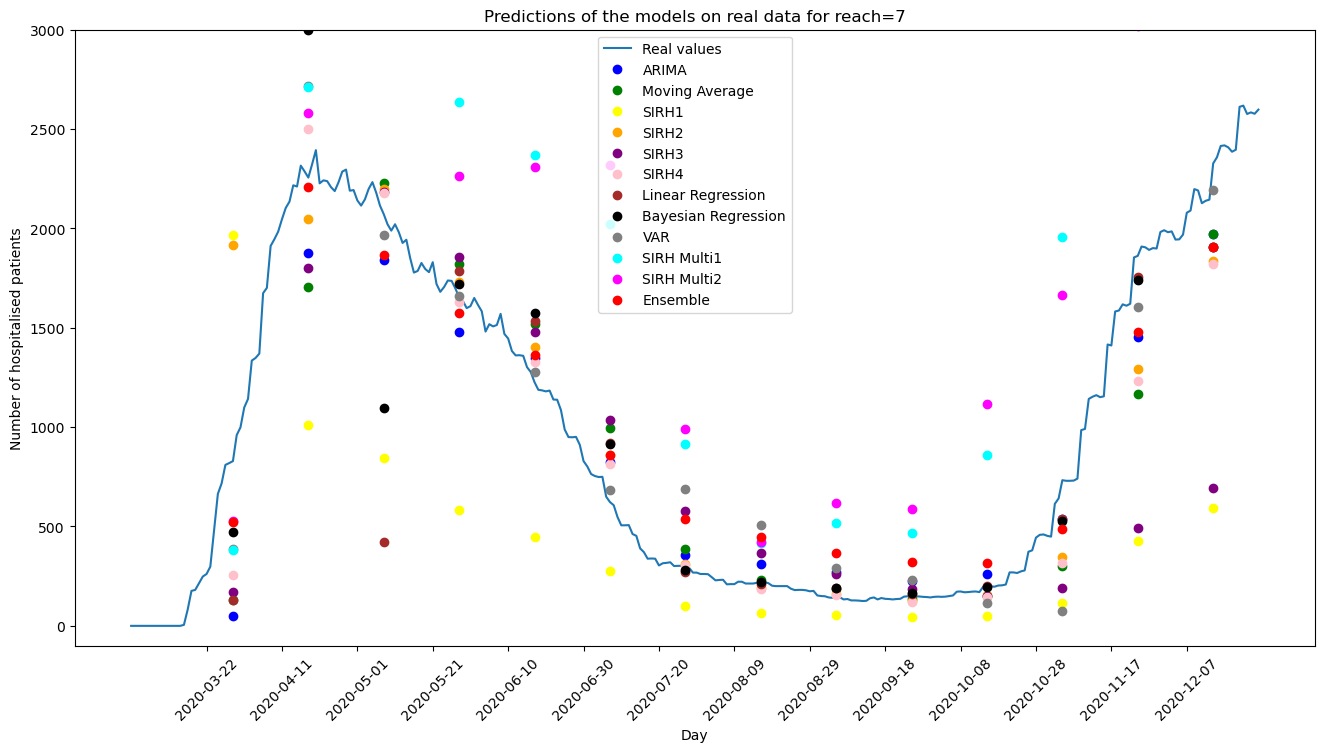

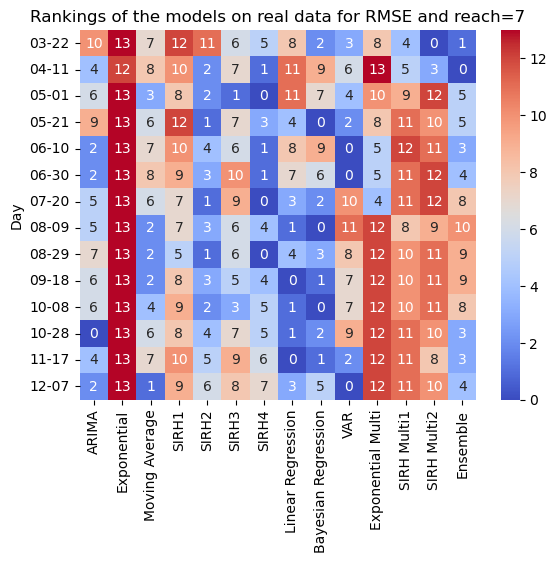

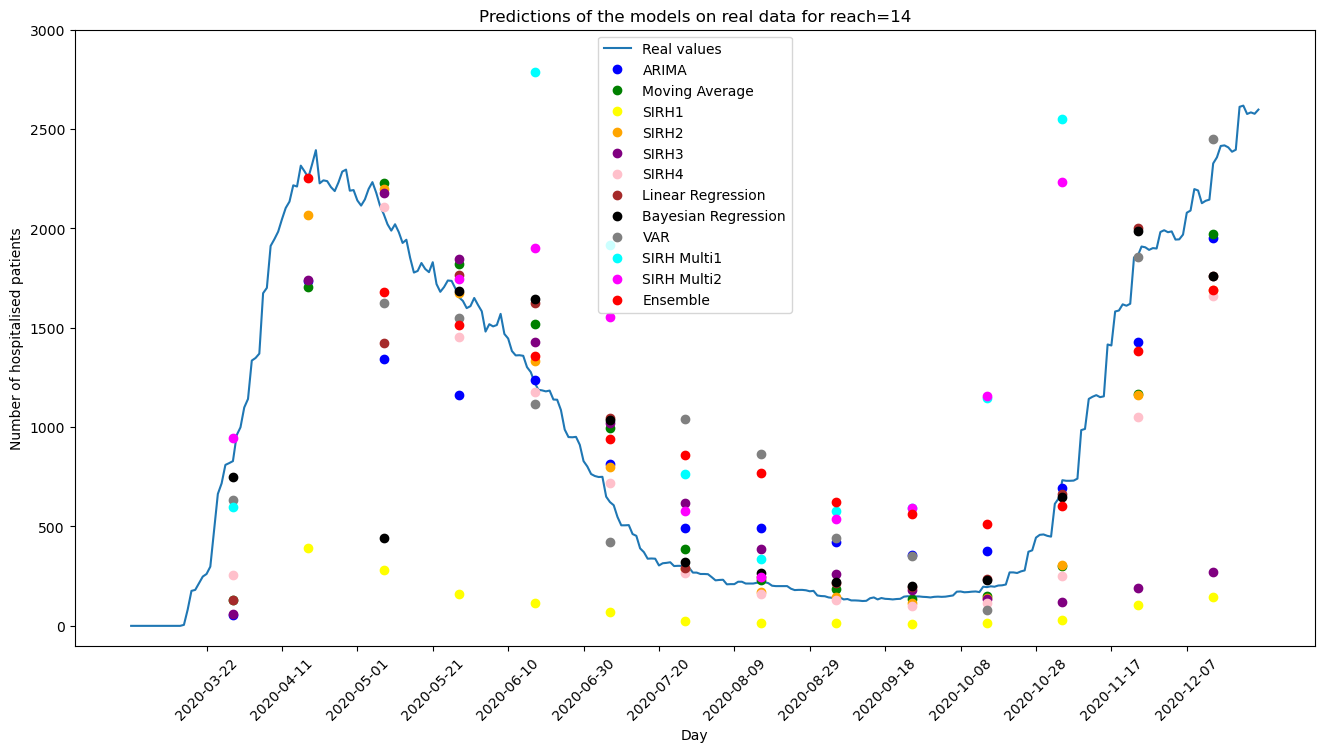

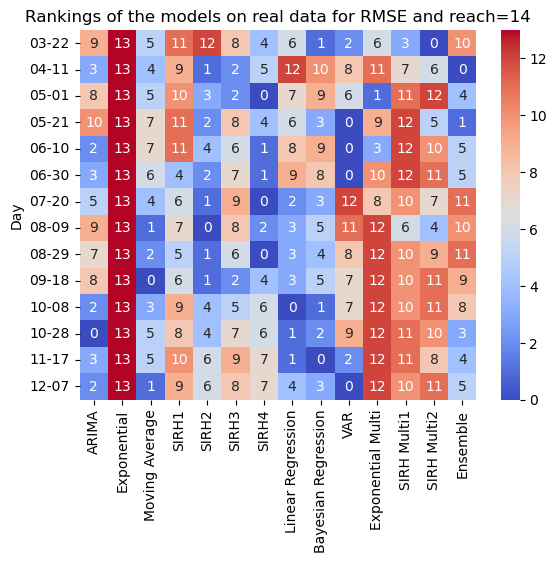

In [208]:
for loss in ['RMSE']: 
    for reach in ['7', '14']:
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.plot(hosp[:300], label='Real values')
        if reach=='7':
            coefs=coefs_7_days
            intercept=intercept_7_days
        else:
            coefs=coefs_14_days
            intercept=intercept_14_days
        
            
        df_results=pd.DataFrame(np.zeros((14, 13)))    # 14 points and 13 models 
        df_results=pd.DataFrame(np.zeros((14, 14)))    # 14 points and 14 models 
        df_results.index=[str(20*i) for i in range(1, 15)]
        df_results.columns= list_models + ['Ensemble']
        mob='final'
        pand='test'
        name='evaluation_with_'+loss+'_of_1D_models_on_pandemic_final_test_and_reach_='+reach+'.csv'
        dicoresults1=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
        dicoresults2=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name.replace('1D', '3D')))
        dicoresults=concat_dico(dicoresults1, dicoresults2)
        df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
        df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
        df.drop(['Unnamed: 0'], axis=1, inplace=True)
        n_hospitalized = np.array(df.loc['n_hospitalized'])
        r_eff=np.array(df.loc['r_eff'])
        indexs_points=[[20*i] for i in range(1, 15) ] 
        prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
        prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
        prediction.index=[20*i for i in range(1, 15)]
        prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi', 'Moving Average Multi'], axis=1)
        prediction_all=prediction
        prediction=prediction_bis
        for point in indexs_points: 
            real_value=prediction_all['Real values'].loc[point[0]]
            ensemble_value=np.matmul(np.array(prediction.loc[point[0]]), coefs) +intercept
            ensemble_perf=np.sqrt((ensemble_value-real_value)**2)
            preds=(prediction_bis.loc[int(point[0])])
            names_models=preds.index
           

            for mycount in range(len(preds)): 
                if point[0]==20: 
                    ax.plot(int(point[0]+7), preds[mycount],'o', color=colors_models[names_models[mycount]], label=names_models[mycount])
                else : 
                    ax.plot(int(point[0]+7), preds[mycount],'o',  color=colors_models[names_models[mycount]])
           
            if point[0]==20:
                ax.plot(int(point[0]+7), ensemble_value, 'ro', label='Ensemble')
            else :
                ax.plot(int(point[0]+7), ensemble_value, 'ro')
            perfs=dicoresults[str(point)]
            assert(len(perfs)==14)
            assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11])) 
            perfs.pop(11) # remove the moving average multi
            assert(len(perfs)==13)
            perfs.append(ensemble_perf)
            rankings=get_classement(perfs)
            df_results.loc[str(point[0])]=rankings
        ax.legend()
        ax.set_ylim((-100,3000))
        plt.title('Predictions of the models on real data for reach='+reach)
        plt.ylabel('Number of hospitalised patients')
        plt.xlabel('Day')
        ax.set_xticks([20*i for i in range(1, 15)], labels=[dates[[20*i for i in range(1, 15)]][j].strftime('%Y-%m-%d') for j in range(14)], rotation=45)
        # rotation: 
       
        plt.show()

        sns.heatmap(df_results, annot=True, cmap='coolwarm', fmt='g', yticklabels=[dates[[20*i for i in range(1, 15)]][j].strftime('%m-%d') for j in range(14)])
        plt.title('Rankings of the models on real data for '+loss+' and reach='+reach)
        plt.ylabel('Day')
        plt.yticks(ticks = [i-0.5 for i in range(1, 15)], labels=[dates[[20*i for i in range(1, 15)]][j].strftime('%m-%d') for j in range(14)])
        
        plt.show()

